### Zadatak 3.

Jedan proizvodjač kafe je u toku 12 nedelja pratio uspešnost prodaje kesica kafe u zavisnosti od širine dela police koju je imao na raspolaganju. Tako dobijene vrednosti su zabeležene u datoteci coffee.csv.

a) Nacrtati grafik zavisnosti prodaje kesica kafe u odnosu na širine police. Da li postoji opravdanje za modelovanje ovog problema linearnom regresijom?

b) Odrediti odgovarajući regresioni model korišćenjem biblioteke scikit-learn.

c) Odrediti regresioni model **bez** korišćenja biblioteke sciki-learn.

d) Dati ocenu greške modela na osnovu kontrolnih podataka koji su sadržani u datoteci *coffee_validation.csv*.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('coffee.csv')
data_val = pd.read_csv('coffee_validation.csv')


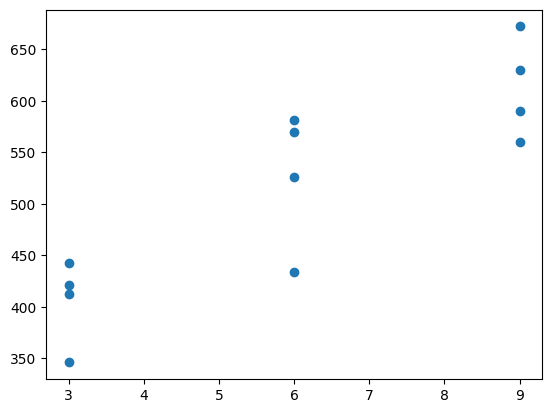

In [21]:
#a
plt.scatter(data['ShelfSpace'], data['Sales'])
plt.show()
# postoji linearna zavisnost, ima smisla modelovati linearnom regresijom


In [22]:
#b
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data['ShelfSpace'].values.reshape(-1, 1), data['Sales'].values)

np.float64(307.91666666666663)

In [24]:
space = np.array(data['ShelfSpace'])
space
sales = np.array(data['Sales'])
ones = np.ones(len(space))
A = np.vstack((ones, space)).T
x, rss, _, _ = np.linalg.lstsq(A, sales.T)
# plt.scatter(space, sales)
# plt.plot(space, x[0] + x[1] * space, color='red')
# plt.show()


In [25]:
preds = x[0] + x[1] * data_val['ShelfSpace']


3210.6716269841268


In [29]:
from sklearn.metrics import mean_squared_error
lstsq_mse = mean_squared_error(data_val['Sales'], preds)
sklearn_mse = mean_squared_error(data_val['Sales'], model.predict(data_val['ShelfSpace'].values.reshape(-1, 1)))
print(lstsq_mse)
print(sklearn_mse)


3210.6716269841268
3210.671626984126
